There is a problem in keeping aspect ratios same while plotting together \n
The axes however confirm the actual sizes of images

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import image as im
%matplotlib inline 

In [2]:
# # Open the image form working directory
# image = Image.open('circles_concentric.png')
# # summarize some details about the image
# print(image.format)
# print(image.size)
# print(image.mode)
# # show the image
# image.show()
# pixel = np.asarray(image)

float32
(512, 512)


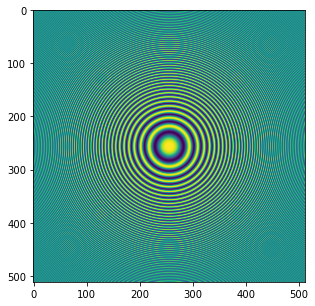

(numpy.ndarray, (512, 512))

In [3]:
img = im.imread('circles_concentric.png')
# summarize shape of the pixel array
print(img.dtype)
print(img.shape)
# display the array of pixels as an image
fig = plt.figure(figsize = (5,5))
fig = plt.imshow(img)
plt.show()
data = np.asarray(img)
data = 255*data
type(data) , data.shape

In [4]:
def myShrinkImageByFactorD(d , arr):
    lis ,finlis =[], []
    for i in range(0, len(arr), d):
        temp = [arr[i][j] for j in range(0, len(arr[i]) ,d)]
        lis.append(temp)
    #finlis = [i for index,i in enumerate(lis) if index%d==0 ]
    return np.array(lis)

In [5]:
array  = myShrinkImageByFactorD(5, data)
type(array) , array.shape

(numpy.ndarray, (103, 103))

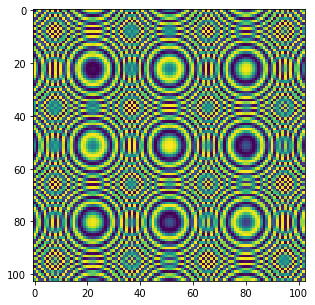

In [6]:
fig2 = plt.figure(figsize = (5,5))
fig2 = plt.imshow(array, interpolation='nearest')
plt.show()


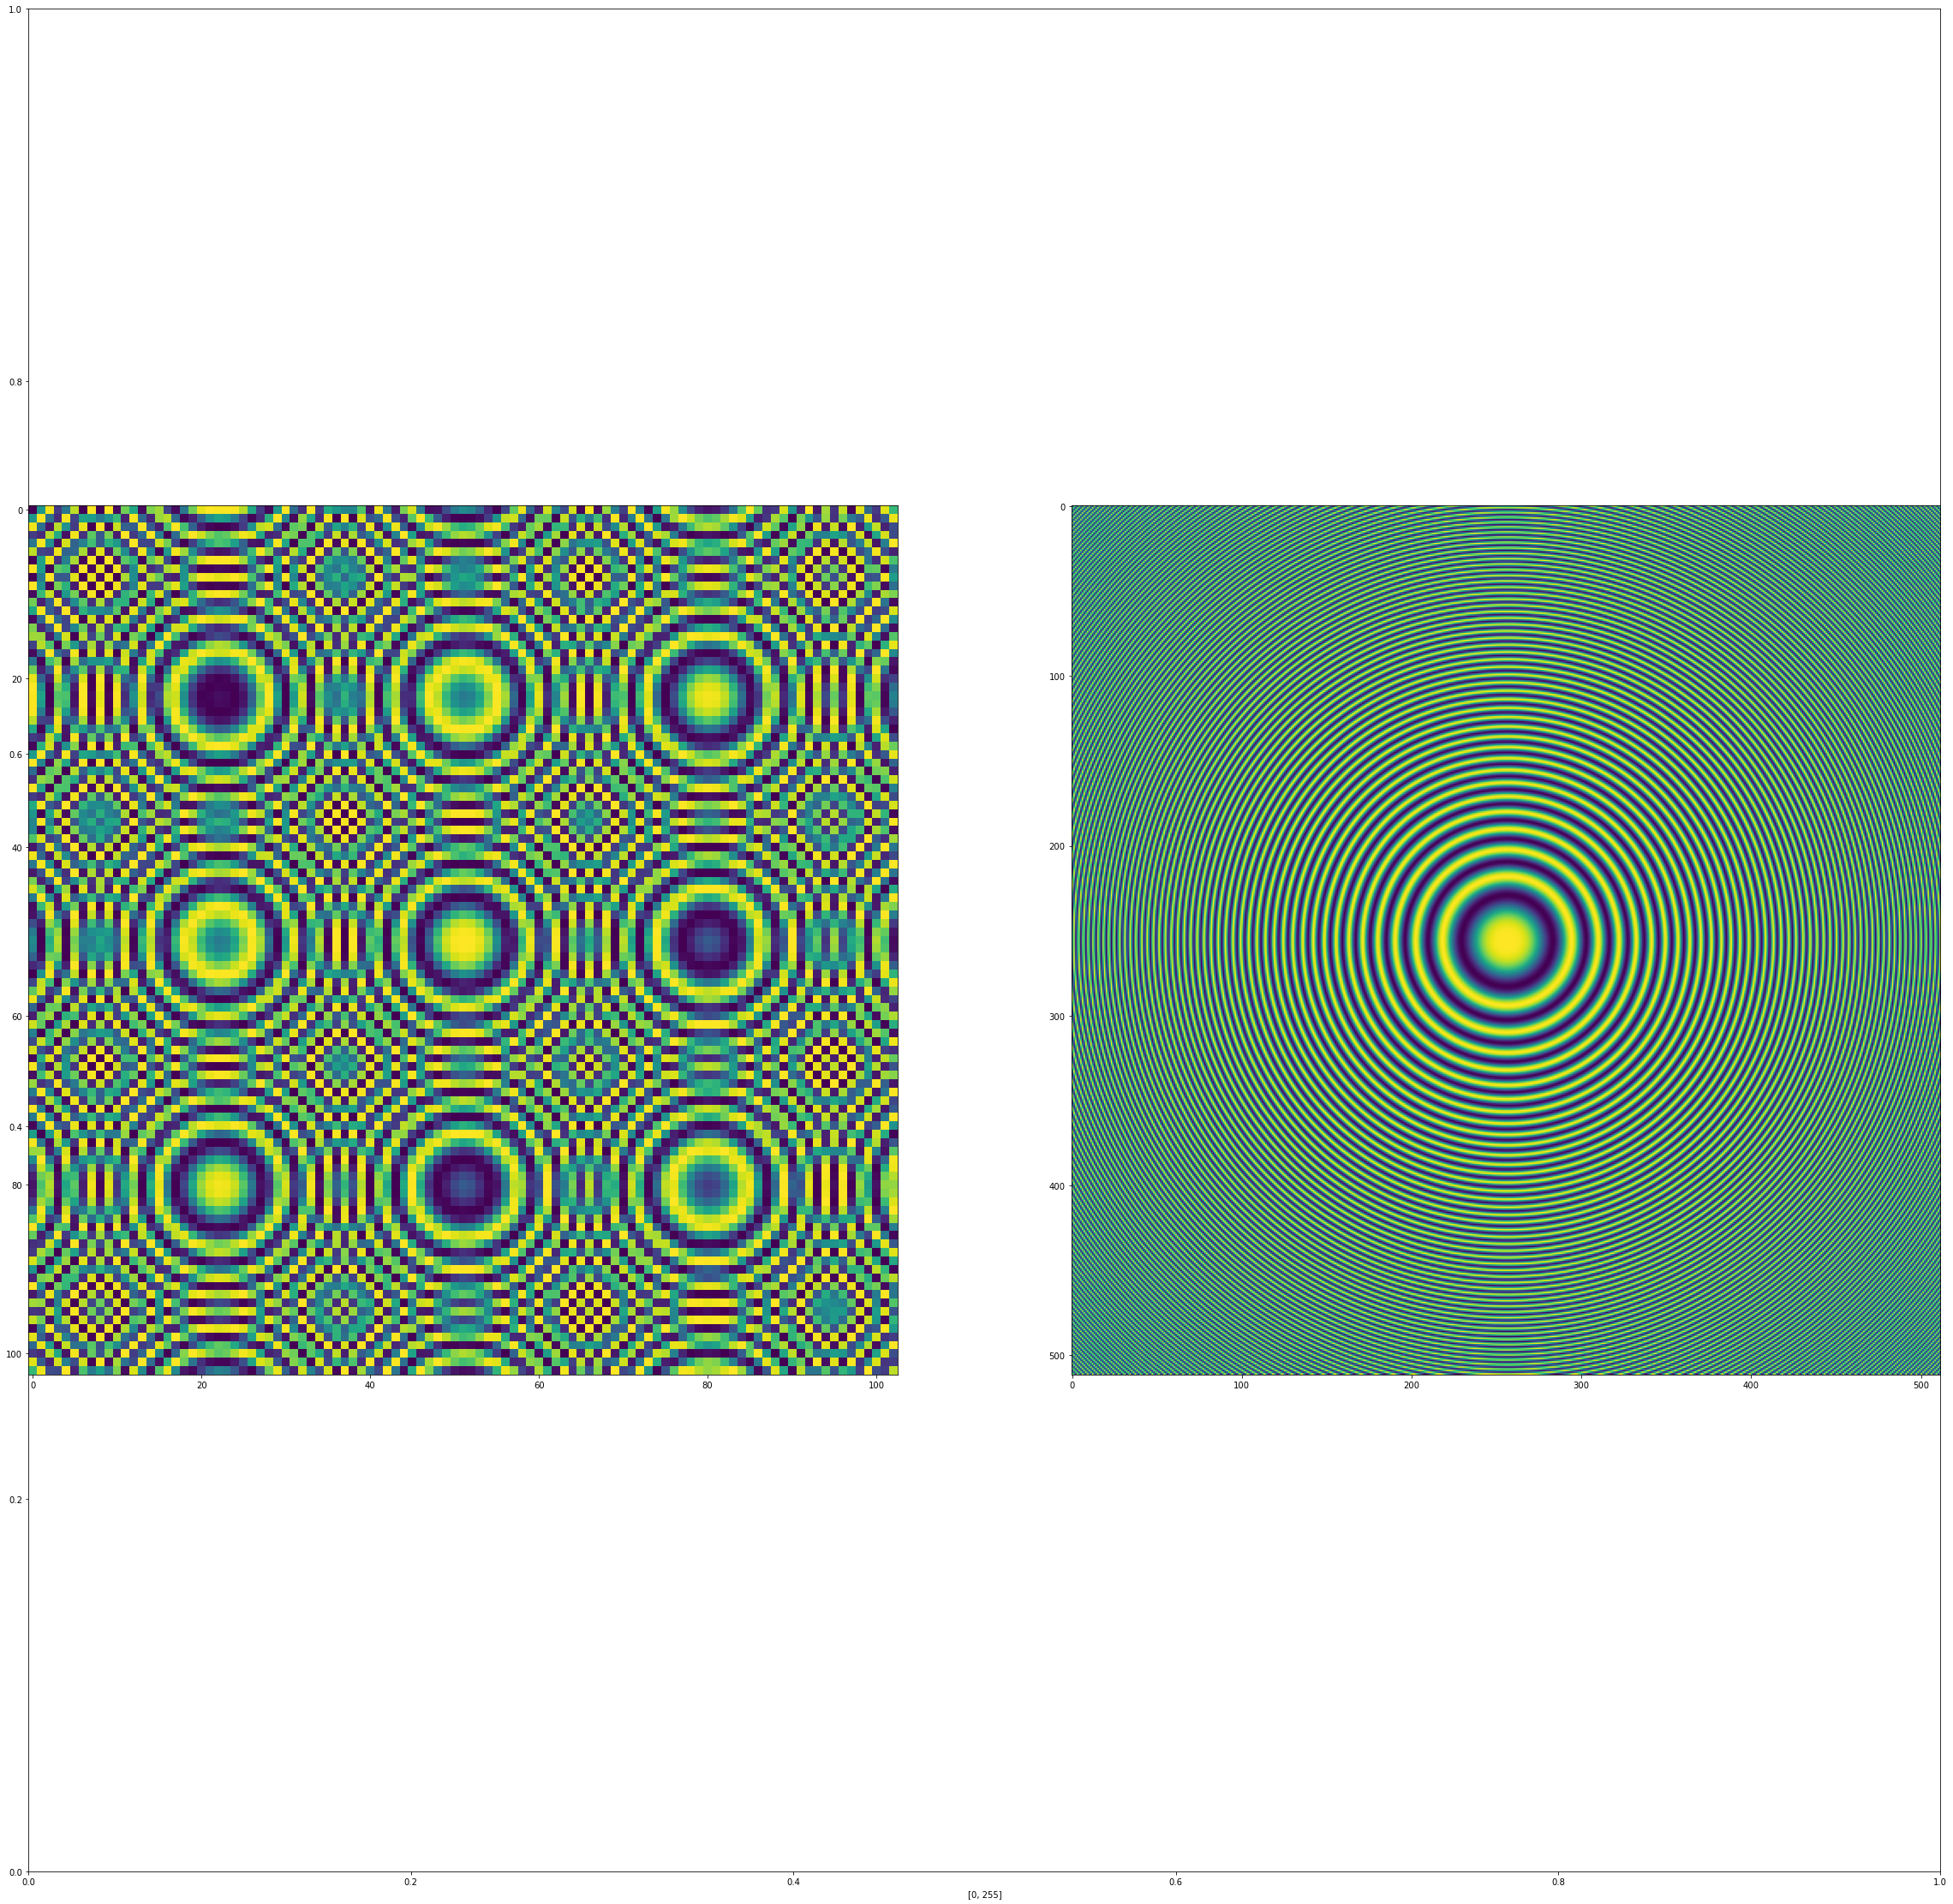

In [7]:
f = plt.figure(figsize = (40,40))
ax = plt.gca()
ax.set_xlabel([0,255])
f.add_subplot(1,2, 1)
plt.imshow(array )
f.add_subplot(1,2, 2)
plt.imshow(img)
plt.show(block=True)

In [8]:
def func_b(d , arr):
    return

#####  part b

float32
(103, 103)


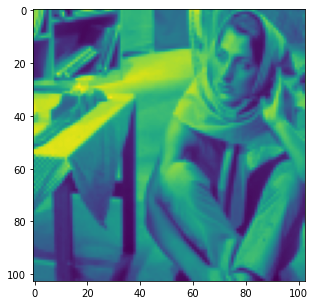

(numpy.ndarray,
 (103, 103),
 array([[201., 213., 183., ...,  82.,  91.,  92.],
        [209., 213., 178., ...,  92.,  96., 103.],
        [209., 213., 177., ...,  97.,  95., 120.],
        ...,
        [ 99., 100.,  98., ..., 118., 123., 115.],
        [ 97., 100., 102., ...,  98., 112., 112.],
        [ 92.,  95.,  94., ...,  82., 100., 109.]], dtype=float32))

In [9]:
img = im.imread('barbaraSmall.png')
# summarize shape of the pixel array
print(img.dtype)
print(img.shape)
# display the array of pixels as an image
fig = plt.figure(figsize = (5,5))
fig = plt.imshow(img)
plt.show()
data = np.asarray(img)
data = 255*data
type(data) , data.shape , data

In [10]:
def myBilinearInterpolation(data):
    arr = [list(np.array(data[0]))]
    #print(arr)
    for i in range(1 , data.shape[0]):
        arr.append(list(data[i-1] + (data[i]-data[i-1])/3)) 
        arr.append(list(data[i-1] + 2*(data[i]-data[i-1])/3))
        arr.append(list(data[i]))
    finarr = []
    for i in arr:
        x=[i[0]]
        for j in range(1, data.shape[1]):
            x.append((i[j-1] + i[j])/2)
            x.append(i[j])
        finarr.append(x)
    return np.array(finarr)   

(307, 205)


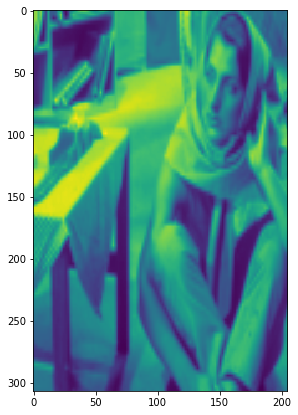

In [11]:
x = myBilinearInterpolation(data)
print(x.shape)
fig3 = plt.figure(figsize = (7,7))
fig3 = plt.imshow(x, interpolation='nearest')
plt.show()

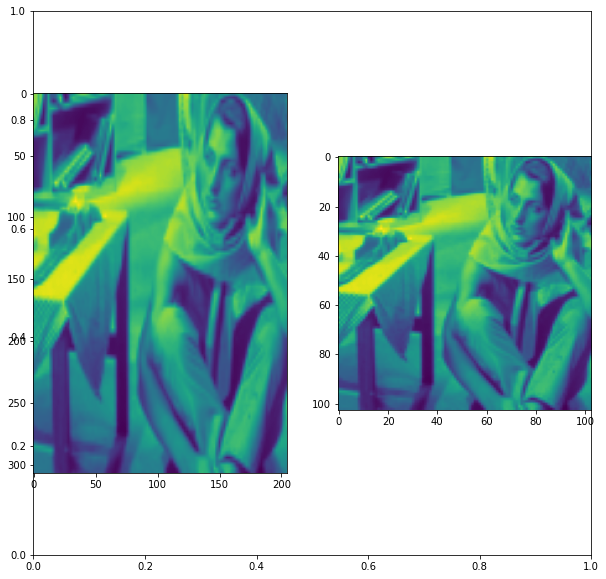

In [12]:
f = plt.figure(figsize = (10,10))
ax = plt.gca()
#ax.set_xlabel([0,255])
f.add_subplot(1,2, 1)
plt.imshow(x)
f.add_subplot(1,2, 2)
plt.imshow(data)
plt.show()

In [17]:
def myNearestNeighborInterpolation(data):
    arr = []
    for i in data:
        x = [i[0]]
        for j in i[1:]:
            x.append(j)
            x.append(j)
        arr.append(x)

    finarr = [arr[0]]
    for i in arr[1:]:
        finarr.append(i)
        finarr.append(i)
        finarr.append(i)
    return np.array(finarr)

(307, 205)


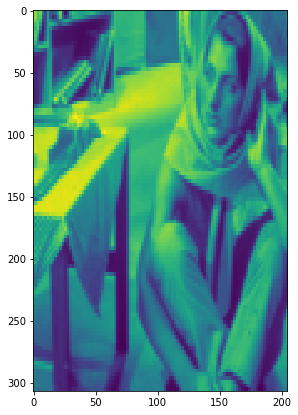

In [19]:
y = myNearestNeighborInterpolation(data)
print(y.shape)
fig3 = plt.figure(figsize = (7,7))
fig3 = plt.imshow(y , interpolation = 'nearest')
plt.show()

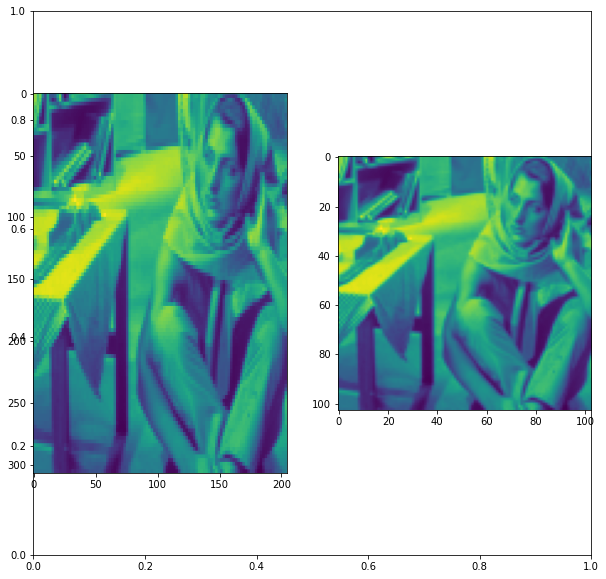

In [21]:
f = plt.figure(figsize = (10,10))
ax = plt.gca()
#ax.set_xlabel([0,255])
f.add_subplot(1,2, 1)
plt.imshow(y)
f.add_subplot(1,2, 2)
plt.imshow(data)
plt.show()

In [103]:
def func(p0, p1, p2, p3):
    f0 = p1
    f1 = p2
    f0d = (p2 - p0)/2
    f1d = (p3-p1)/2 
    d = f0
    c = f0d
    a = 2*f0 - 2*f1 + f0d + f1d 
    b = -3*f0 + 3*f1 - 2*f0d - f1d
    ar = np.array([a, b, c, d])   #shape (1,3)
    #print(ar, 'coeff_array')    
    return ar 

In [137]:
def myBicubicInterpolation(data):
    img = data
    temp = np.zeros((1 , len(img)))
    img = np.vstack([temp , img]) 
    img = np.vstack([img, temp])
    temp = np.zeros((img.shape[0]  , 1))
    img = np.hstack([temp , img])
    img = np.hstack([img , temp])
    
    arr = []
    for i in img:
        x = []
        for ind , j in enumerate(i[1: len(i)-2]):                   
            x.append(float(j))
            W = func(i[ind] , i[ind+1] , i[ind+2] , i[ind+3])
            W  = W.reshape(1,-1)
            s = 1/3
            X = np.array([[s**3 , s**2  ,s**1 , 1]])  
            val = float(np.dot(W , X.T ))
            x.append(val)
#             s = 2/3
#             X = np.array([[s**3 , s**2  ,s**1 , 1]])  
#             val = float(np.dot(W , X.T ))
#             x.append(val)
            #print(W , x , val , 'wxval')
        x.append(i[len(i)-2])
        arr.append(x)
    arr = np.array(arr)
    finarr = np.zeros((1, arr.shape[1]))
    for ind ,i in enumerate(arr[1:len(arr) -2 ]):  # you might need to conv everything in finarr to lis
        finarr = np.vstack([finarr , i])
        W = func2(arr[ind] , arr[ind+1] , arr[ind+2] , arr[ind+3])
        s = 1/3
        X = np.array([[s**3 , s**2  ,s**1 , 1]]) 
        val = np.dot(X , W)
        finarr = np.vstack([finarr , val])
        s = 2/3
        X = np.array([[s**3 , s**2  ,s**1 , 1]]) 
        val = np.dot(X , W)
        finarr = np.vstack([finarr , val])
#         finarr.append(list(val))
#     finarr.append(list(arr[-2]))
    #print(finarr[:3])
    #print( val ,type(val), val.shape , 'WWWWW')    
      
#     print("PRINTING ARR" ,  arr[:3]  )
#     print(arr[1].shape)
#     #append len(last-1)
    finarr = np.vstack([finarr , arr[-2]])
    finarr = finarr[1:]
    return finarr

(307, 205) [[201.         220.55555556 213.         204.2962963  183.
  189.25925926 202.         182.96296296 125.          97.25925926
   61.          83.51851852 144.         128.62962963  72.
   68.07407407  77.          75.55555556  79.          99.03703704
  144.         147.51851852 127.          96.25925926  26.
   13.7037037   14.          21.25925926  48.          64.96296296
  100.         110.40740741 126.         136.03703704 157.
  167.14814815 186.         193.85185185 206.         209.48148148
  212.         211.40740741 206.         200.74074074 186.
  176.74074074 156.         145.11111111 126.         120.88888889
  120.         127.25925926 150.         161.40740741 182.
  187.37037037 190.         186.59259259 173.         164.59259259
  145.         133.37037037 114.         112.81481481 124.
  139.77777778 174.         175.88888889 168.         167.85185185
  169.         169.18518519 169.         168.14814815 166.
  165.44444444 165.         165.22222222 166.   

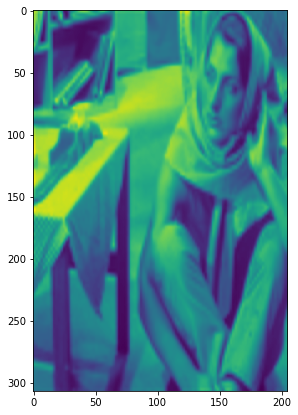

In [138]:
z = myBicubicInterpolation(data)
print(z.shape , z[:2])
fig3 = plt.figure(figsize = (7,7))
fig3 = plt.imshow(z)
plt.show()

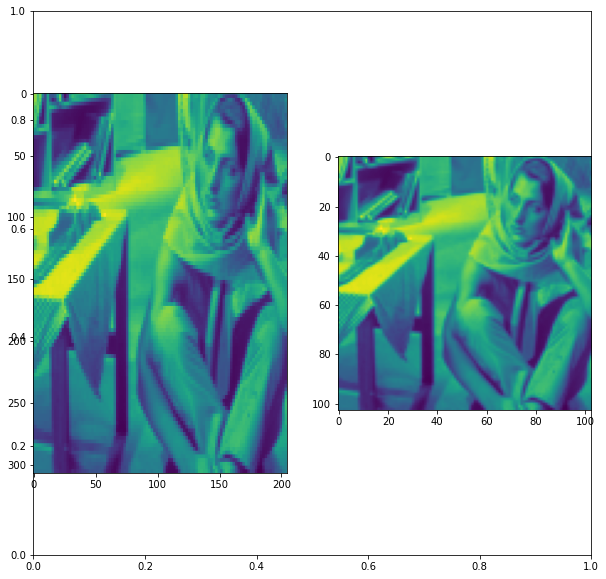

In [139]:
f = plt.figure(figsize = (10,10))
ax = plt.gca()
#ax.set_xlabel([0,255])
f.add_subplot(1,2, 1)
plt.imshow(y)
f.add_subplot(1,2, 2)
plt.imshow(data)
plt.show()